<a href="https://colab.research.google.com/github/sarannetworkprogammer/Ml_rad/blob/main/Mnist_data_set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MNIST Dataset

1.   Data loader , Tansformation
2.   multilayer neural net, activation function
loss and optmize
training loop
model evaluation
gpu support


In [39]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets

In [40]:
# device config

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


#hyperparameters 

input_size =  784   # our image size is 28*28 which flatens equals to 784
hidden_size = 100
num_classes = 10
num_epochs = 10
batch_size = 100
learning_rate = 0.01


torch.Size([100, 1, 28, 28]) torch.Size([100])


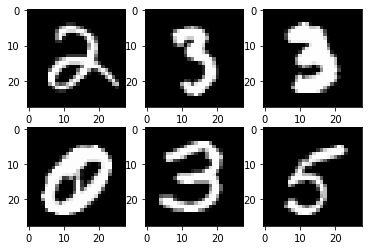

In [41]:
# MNIST data set 


train_dataset = torchvision.datasets.MNIST(root="./data", train=True, transform = transforms.ToTensor(), download= True)

test_dataset = torchvision.datasets.MNIST(root="./data", train=False, transform = transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)


examples = iter(train_loader)
samples,labels = examples.next()
print(samples.shape, labels.shape)
 
# Here 100 samples 1 is channel which grey image, and image size is 28*28

for i in range(6):
  plt.subplot(2,3,i+1)
  plt.imshow(samples[i][0],cmap="gray")

plt.show()

In [42]:
class NeuralNet(nn.Module):

  def __init__(self,input_size, hidden_size, num_classes):

    super(NeuralNet, self).__init__()
    self.linear1 = nn.Linear(input_size,hidden_size)
    self.linear2 = nn.Linear(hidden_size, num_classes)


  def forward(self,x):

    out = torch.relu(self.linear1(x))
    out = self.linear2(out)

    return out


model = NeuralNet(input_size, hidden_size, num_classes)


In [43]:
#loss and optmizer

criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [44]:
# training loop

n_total_steps = len(train_loader)

for epoch in range(num_epochs):
  for i , (images,labels) in enumerate(train_loader):
    images = images.reshape(-1, 28*28).to(device)
    
    labels = labels.to(device)

    # forward

    outputs = model(images)

    loss = criterion(outputs, labels)


    # backwards

    optimizer.zero_grad()

    loss.backward()
    
    optimizer.step()

    if (i+1) %100 == 0:
      print(f"epoch = {epoch+1}/{num_epochs} , step{i+1}/{n_total_steps} , loss = {loss.item():4f} ")



epoch = 1/10 , step100/600 , loss = 0.351455 
epoch = 1/10 , step200/600 , loss = 0.216901 
epoch = 1/10 , step300/600 , loss = 0.122983 
epoch = 1/10 , step400/600 , loss = 0.141484 
epoch = 1/10 , step500/600 , loss = 0.164117 
epoch = 1/10 , step600/600 , loss = 0.484805 
epoch = 2/10 , step100/600 , loss = 0.162002 
epoch = 2/10 , step200/600 , loss = 0.080623 
epoch = 2/10 , step300/600 , loss = 0.025678 
epoch = 2/10 , step400/600 , loss = 0.205818 
epoch = 2/10 , step500/600 , loss = 0.089227 
epoch = 2/10 , step600/600 , loss = 0.133485 
epoch = 3/10 , step100/600 , loss = 0.054392 
epoch = 3/10 , step200/600 , loss = 0.076245 
epoch = 3/10 , step300/600 , loss = 0.060484 
epoch = 3/10 , step400/600 , loss = 0.036088 
epoch = 3/10 , step500/600 , loss = 0.076336 
epoch = 3/10 , step600/600 , loss = 0.039189 
epoch = 4/10 , step100/600 , loss = 0.036788 
epoch = 4/10 , step200/600 , loss = 0.112687 
epoch = 4/10 , step300/600 , loss = 0.207683 
epoch = 4/10 , step400/600 , loss 

In [46]:
# test  and finding accuracy how many predicted samples are matching with actual samples

with torch.no_grad():
  n_correct = 0
  n_samples = 0

  for images, labels in test_loader:
    images = images.reshape(-1, 28*28).to(device)
    
    labels = labels.to(device)

    output = model(images)
    # vlaue, index 
    _,predictions = torch.max(outputs,1)
    n_samples += labels.shape[0]
    n_correct += (predictions == labels).sum().item()

  acc = 100.0 * (n_correct/n_samples)

  print(f"accuracy ={acc}")



accuracy =10.58
